In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import plotly.express as px
%matplotlib inline

from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
df=pd.read_csv(r"C:\Users\HP\Downloads\zomato.csv\zomato.csv")

In [3]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [8]:
print("The number of rows:{}".format(df.shape[0]))
print("The number of columns:{}".format(df.shape[1]))

The number of rows:51717
The number of columns:17


In [6]:
df.shape[0]

51717

In [10]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [11]:
df["Rating_from_5"]=df['rate'].dropna().apply(lambda x : float(x.split('/')[0]) if (len(x)>3)  else np.nan ).dropna()

In [13]:
import plotly

In [15]:
top_chains=df['name'].value_counts()[:20]
fig=px.bar(top_chains, x='name',y=top_chains.index,labels={'index':"Restaurant Name", 'name':"Count in the city"},color='name')
fig.update(layout_coloraxis_showscale=False)

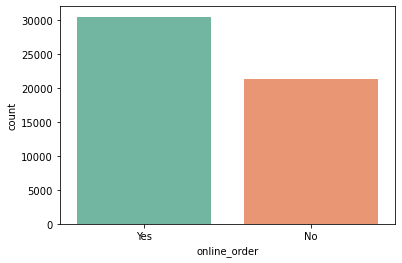

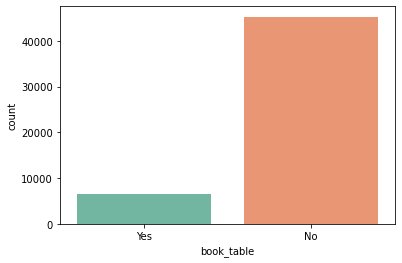

In [20]:
flag=["online_order", "book_table"]
for val in flag:
    sns.countplot(x=val, data=df,palette ="Set2")
    plt.show()

<AxesSubplot:xlabel='online_order', ylabel='count'>

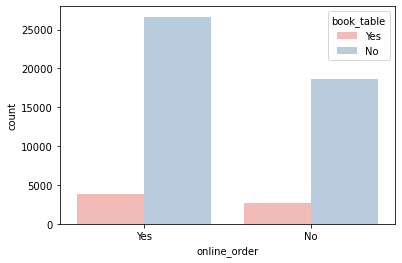

In [21]:
sns.countplot(x='online_order', data=df, hue='book_table', palette = "Pastel1")

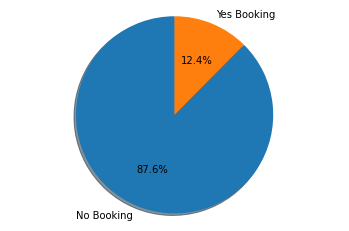

In [25]:
# Percentage division of offline restaurants which accept pre booking
b=df.groupby(['online_order','book_table']).book_table.value_counts().sort_values(ascending=False)
sizes=[]
for i in range (2):
    sizes.append(b.loc['No'][i])
labels=['No Booking', 'Yes Booking']
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# Top 10 online and 10 offline restaurants

In [36]:
#Top 10 online restaurants
a=df.groupby(['online_order','name']).name.count().sort_values(ascending=False)
top_online=a.loc['Yes'][:10]
top_offline=a.loc['No'][:10]

In [42]:
fig=px.bar(top_online, x='name',y=top_online.index,labels={'index':"Restaurant Name", 'name':"Count in the city"},color="name", color_continuous_scale=px.colors.sequential.Viridis)
fig.update(layout_coloraxis_showscale=False)

In [44]:
# Top 10 offline restaurants
fig=px.bar(top_offline, x='name',y=top_offline.index,labels={'index':"Restaurant Name", 'name':"Count in the city"},color="name", color_continuous_scale='Inferno')
fig.update(layout_coloraxis_showscale=False)

In [187]:
#No. of votes for online and offline orders
px.violin(df,y="votes", x="online_order", color="online_order", box=True,points="all",width=800, height=400)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Rating_from_5', ylabel='Density'>

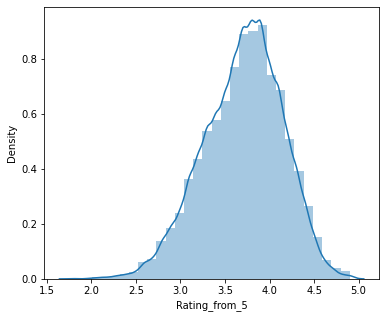

In [55]:
# Rating distribution out of 5
plt.figure(figsize=(6,5))
sns.distplot(df['Rating_from_5'],bins=30)

In [ ]:
#maximum restaurants have  arating between 3.5 to 4

In [56]:
c=b=df.groupby(['online_order'])["Rating_from_5"].mean()

In [62]:
print("The average rating of restaurants delivering online order is {:.2f} and the average rating of restaurants delivering offline order is {:.2f}".format(c[1],c[0]))

The average rating of restaurants delivering online order is 3.72 and the average rating of restaurants delivering offline order is 3.66


In [184]:
#Top 10 locations in the city 
top_locations=df['location'].value_counts()[:10]
fig=px.bar(top_locations, x='location',y=top_locations.index,labels={'index':"Location", 'name':"Count in the city"},color='location', color_continuous_scale='armyrose')
fig.update(layout_coloraxis_showscale=False)

In [186]:
#Top 15 restaurant types
top_rest_type=df['rest_type'].value_counts()[:15]
fig=px.bar(top_rest_type, x='rest_type',y=top_rest_type.index,labels={'index':"Restaurant Type", 'name':"Count in the city"},color='rest_type',color_continuous_scale='geyser')
fig.update(layout_coloraxis_showscale=False)

In [138]:
df1=df.groupby(['location','cuisines']).agg({'name':'count'})
df1.reset_index(inplace=True)
df1 = df1.drop_duplicates(subset = ["name"])
df1=df1.sort_values(by="name",ascending = False)
df1.head(10)

location               cuisines  name
240                     BTM  North Indian, Chinese   379
225                     BTM           North Indian   340
7554             Whitefield           North Indian   188
2672                    HSR           North Indian   173
1187              Bellandur           North Indian   161
3466               JP Nagar           North Indian   157
5595           Marathahalli           North Indian   155
4331  Koramangala 1st Block           North Indian   150
5609           Marathahalli  North Indian, Chinese   145
797       Bannerghatta Road  North Indian, Chinese   130

In [163]:
df2=df.groupby(['rest_type','cuisines']).agg({'name':'count'})
df3=pd.DataFrame(df2)
df3.reset_index(inplace=True)
df3 = df3.drop_duplicates(subset = ["name"])
df3=df3.sort_values(by="name",ascending = False)
df3.head(10)

rest_type                             cuisines  name
3360    Quick Bites                         South Indian  1532
3076    Quick Bites                         North Indian  1480
3109    Quick Bites                North Indian, Chinese  1259
282            Cafe                                 Cafe   737
1097  Casual Dining                North Indian, Chinese   712
1057  Casual Dining                         North Indian   695
2816    Quick Bites                            Fast Food   681
2583    Quick Bites                              Biryani   678
3            Bakery                     Bakery, Desserts   561
3431    Quick Bites  South Indian, North Indian, Chinese   504

In [165]:
df["listed_in(type)"].unique

<bound method Series.unique of 0               Buffet
1               Buffet
2               Buffet
3               Buffet
4               Buffet
             ...      
51712    Pubs and bars
51713    Pubs and bars
51714    Pubs and bars
51715    Pubs and bars
51716    Pubs and bars
Name: listed_in(type), Length: 51717, dtype: object>

In [167]:
df4=df.groupby(['listed_in(type)']).agg({'Rating_from_5':'mean'})
df4

Rating_from_5
listed_in(type)                  
Buffet                   3.982105
Cafes                    3.872477
Delivery                 3.653257
Desserts                 3.777013
Dine-out                 3.680826
Drinks & nightlife       4.017062
Pubs and bars            4.022933

In [171]:
df5=df.groupby(['rest_type']).agg({'Rating_from_5':'mean'})
df5.dropna()

Rating_from_5
rest_type                             
Bakery                        3.607955
Bakery, Beverage Shop         3.200000
Bakery, Cafe                  4.009722
Bakery, Dessert Parlor        3.687402
Bakery, Food Court            3.100000
...                                ...
Quick Bites, Sweet Shop       3.570667
Sweet Shop                    3.626012
Sweet Shop, Quick Bites       3.610526
Takeaway                      3.407229
Takeaway, Delivery            3.513622

[87 rows x 1 columns]

In [173]:
df.dtypes

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                            object
votes                            int64
phone                           object
location                        object
rest_type                       object
dish_liked                      object
cuisines                        object
approx_cost(for two people)     object
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
Rating_from_5                  float64
dtype: object

In [178]:
cost_dist=df[['rate','approx_cost(for two people)','online_order']].dropna()
cost_dist['rate']=cost_dist['rate'].apply(lambda x: float(x.split('/')[0]) if len(x)>3 else 0)
cost_dist['approx_cost(for two people)']=cost_dist['approx_cost(for two people)'].apply(lambda x: int(x.replace(',','')))

In [182]:
#Scatter plot for Rating and cost for two people(in Rupees)
px.scatter(df, x="Rating_from_5", y="approx_cost(for two people)", color="online_order")

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



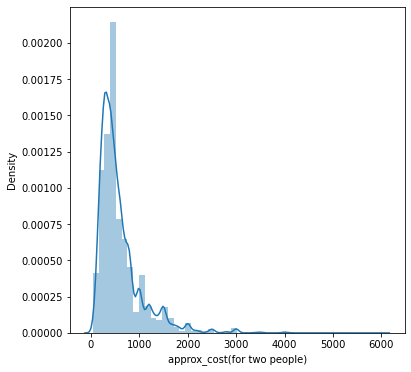

In [180]:
#Distribution of cost for two people in Rupees
plt.figure(figsize=(6,6))
sns.distplot(cost_dist['approx_cost(for two people)'])
plt.show()

In [ ]:
#An average good meal for two people costs less than $12

In [137]:
df1.head(10)

location               cuisines  name
240                     BTM  North Indian, Chinese   379
225                     BTM           North Indian   340
7554             Whitefield           North Indian   188
2672                    HSR           North Indian   173
1187              Bellandur           North Indian   161
3466               JP Nagar           North Indian   157
5595           Marathahalli           North Indian   155
4331  Koramangala 1st Block           North Indian   150
5609           Marathahalli  North Indian, Chinese   145
797       Bannerghatta Road  North Indian, Chinese   130

dfvd